Project by **Sanjay**

BATCH: **PGP-AIML-BA-UTA-OCT24-C**

# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi


# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
superkart_data = pd.read_csv("/content/sample_data/SuperKart.csv",low_memory=False)

In [ ]:
dataset = superkart_data.copy()

# **Data Overview**

In [ ]:
dataset.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
# checking shape of the data
dataset.shape

(8763, 12)

In [ ]:
# checking column datatypes and number of non-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
# checking for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing values
dataset.isnull().sum()

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


**Observations from Data Overview**

* There are 8763 rows and 12 columns in the dataset.

* The columns are Product_Id, Product_Weight, Product_Sugar_Content, Product_Allocated_Area, Product_Type, Product_MRP, Store_Id, Store_Establishment_Year, Store_Size, Store_Location_City_Type Store_Type, and Product_Store_Sales_Total.

* There are no duplicates and no null values in the dataset.



# **Exploratory Data Analysis (EDA)**

## Feature engineering - Product Id

In [ ]:
dataset.Product_Id.nunique()

8763

As Product_Id is a unique identifier, we will drop the column

In [ ]:
dataset.drop('Product_Id', inplace=True, axis=1)

Now that we have separated the target variable, along with the categorical and numerical features, we will proceed with **univariate analysis** to evaluate each variable individually and draw meaningful inferences about their distributions and characteristics.

## Feature Engineering - Product Sugar Content

In [ ]:
dataset['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2251
No Sugar,1519
reg,108


The data description describes **Product_Sugar_Content** as sugar content of each product like low sugar, regular and no sugar. To ensure consistency, we will be replacing reg with regular using **replace**.

In [ ]:
dataset['Product_Sugar_Content'] = dataset['Product_Sugar_Content'].replace('reg', 'Regular')


In [ ]:
dataset['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


Now Product Sugar Content has only 3 values.

In [ ]:
# Define the target variable for the regression task
target = 'Product_Store_Sales_Total' # total revenue generated by the sale of that particular product in that particular store

# List of numerical features in the dataset (excluding 'id' as it is an identifier)
numeric_features = [
    'Product_Weight',         # weight of each product
    'Product_Allocated_Area', # ratio of the allocated display area of each product to the total display area of all the products in a store
    'Product_MRP', # maximum retail price of each product
    'Store_Establishment_Year',  # year in which the store was established
]

# List of categorical features in the dataset
categorical_features = [
    'Product_Sugar_Content',  # sugar content of each product like low sugar, regular and no sugar
    'Product_Type',   # broad category for each product like meat, snack foods, hard drinks, dairy etc.
    'Store_Id',          # unique identifier of each store
    'Store_Size',       # size of the store depending on sq. feet like high, medium and low
    'Store_Location_City_Type', #type of city in which the store is located like Tier 1, Tier 2 and Tier 3
    'Store_Type' #type of store depending on the products that are being sold there
]

## Univariate Analysis

### Generating Statistical Description

In [ ]:
# Generate summary statistics for numerical features
dataset[numeric_features].describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751
std,2.217320,0.048204,30.694110,8.388381
min,4.000000,0.004000,31.000000,1987.000000
25%,11.150000,0.031000,126.160000,1998.000000
50%,12.660000,0.056000,146.740000,2009.000000
75%,14.180000,0.096000,167.585000,2009.000000
max,22.000000,0.298000,266.000000,2009.000000


In [ ]:
# Generate summary statistics for categorical features
dataset[categorical_features].describe()

,Product_Sugar_Content,Product_Type,Store_Id,Store_Size,Store_Location_City_Type,Store_Type
count,8763,8763,8763,8763,8763,8763
unique,3,16,4,3,3,4
top,Low Sugar,Fruits and Vegetables,OUT004,Medium,Tier 2,Supermarket Type2
freq,4885,1249,4676,6025,6262,4676


In [ ]:
# Generate summary statistics for the target variable
dataset[target].describe()

,Product_Store_Sales_Total
count,8763.000000
mean,3464.003640
std,1065.630494
min,33.000000
25%,2761.715000
50%,3452.340000
75%,4145.165000
max,8000.000000


### Creating Labeled Barplots for Categorical Columns


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

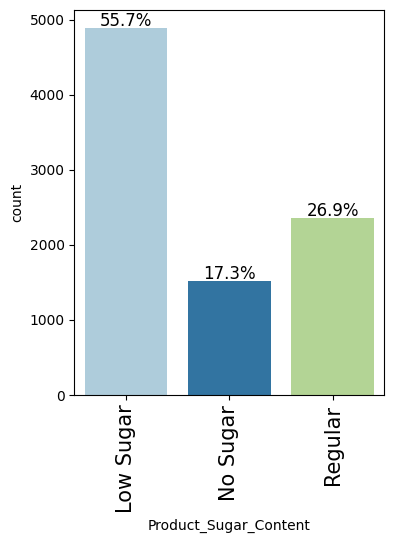

In [ ]:
labeled_barplot(dataset, 'Product_Sugar_Content', perc=True)

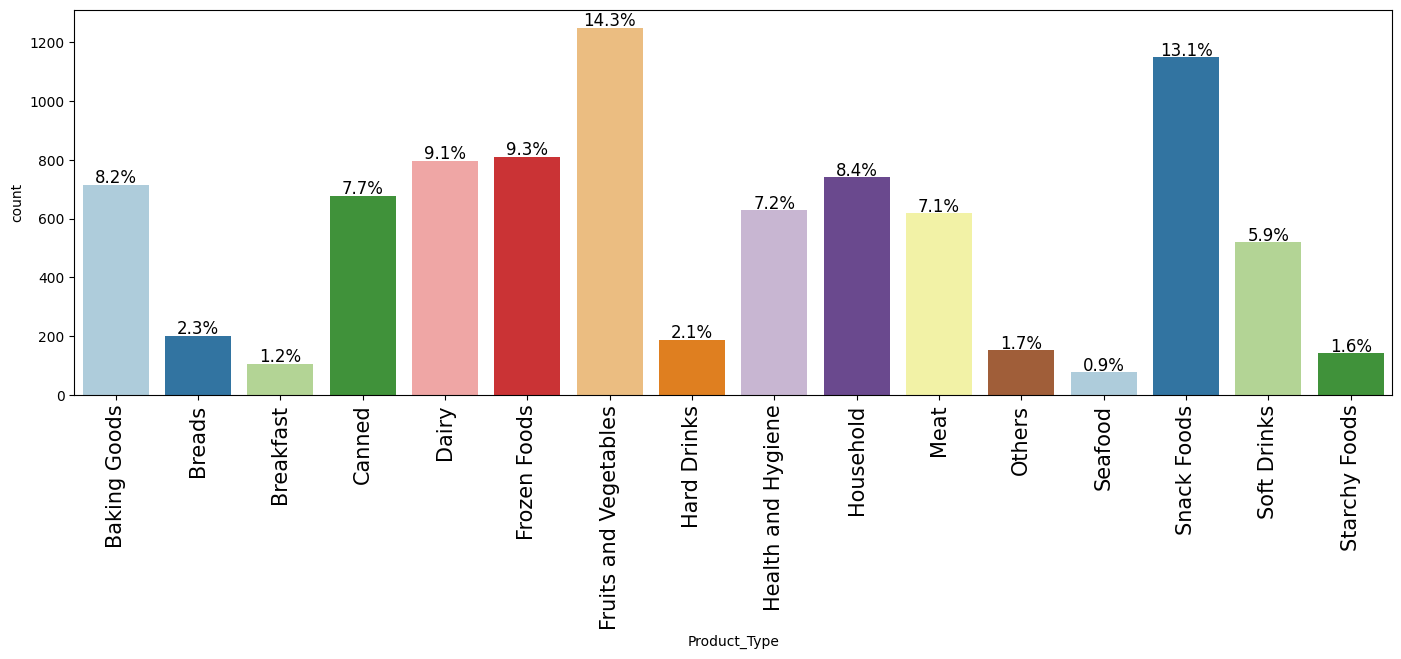

In [ ]:
labeled_barplot(dataset, 'Product_Type', perc=True)

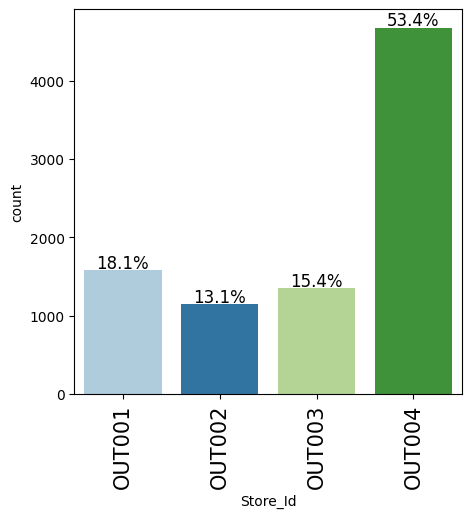

In [ ]:
labeled_barplot(dataset, 'Store_Id', perc=True)

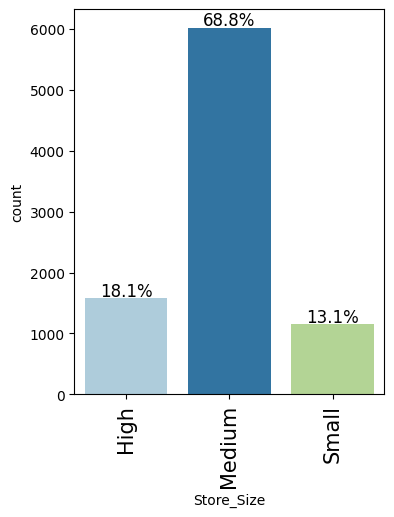

In [ ]:
labeled_barplot(dataset, 'Store_Size', perc=True)

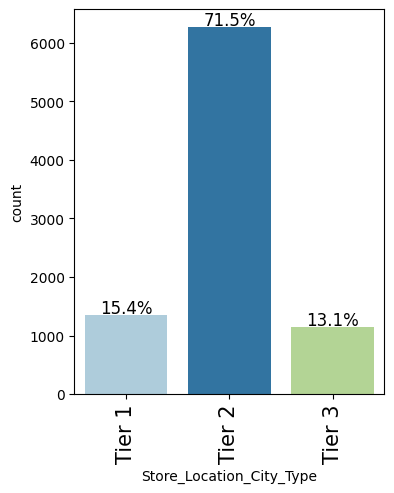

In [ ]:
labeled_barplot(dataset, 'Store_Location_City_Type', perc=True)

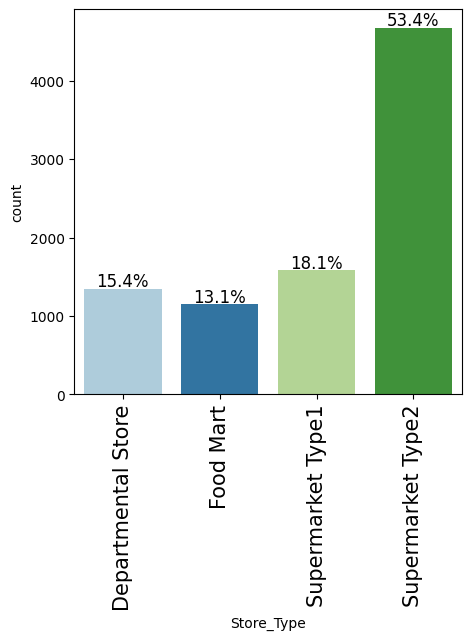

In [ ]:
labeled_barplot(dataset, 'Store_Type', perc=True)

### Creating Histogram for Numerical Columns

<Axes: xlabel='Product_Weight', ylabel='Count'>

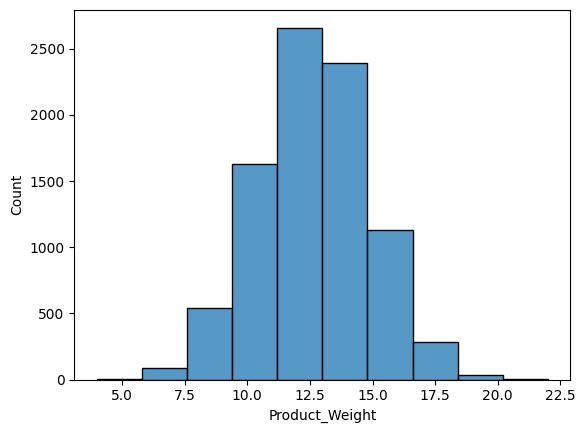

In [ ]:
sns.histplot(dataset['Product_Weight'], bins=10)

<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

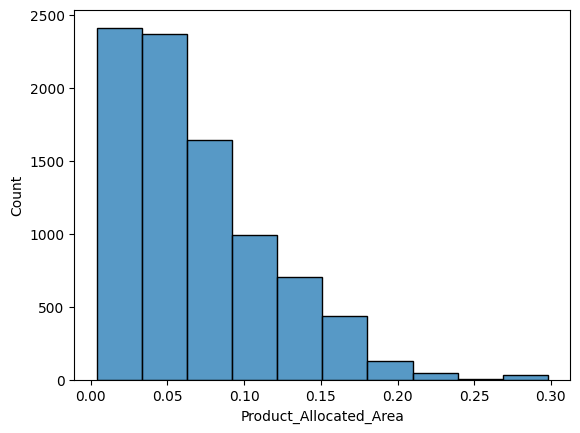

In [ ]:
sns.histplot(dataset['Product_Allocated_Area'], bins=10)

<Axes: xlabel='Product_MRP', ylabel='Count'>

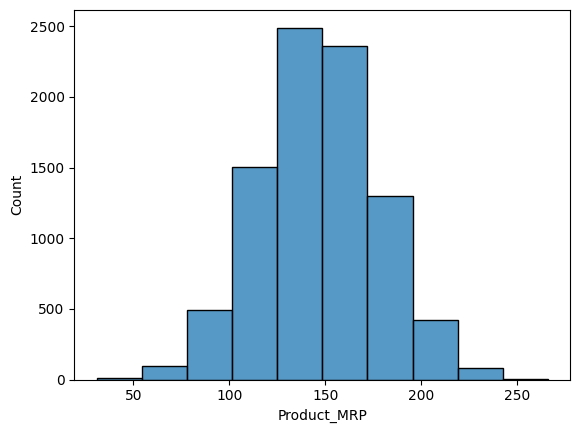

In [ ]:
sns.histplot(dataset['Product_MRP'], bins=10)

<Axes: xlabel='Store_Establishment_Year', ylabel='Count'>

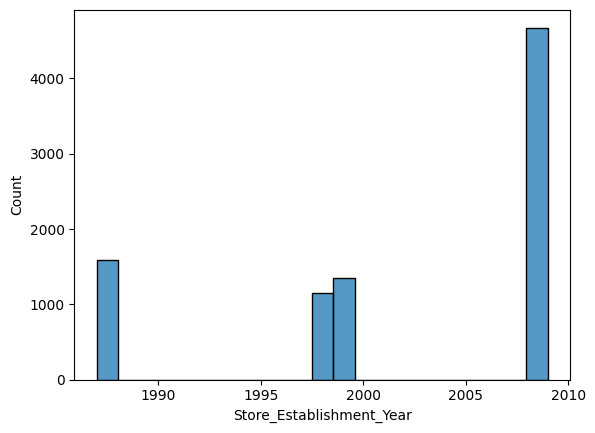

In [ ]:
sns.histplot(dataset['Store_Establishment_Year'])

<Axes: xlabel='Product_Store_Sales_Total', ylabel='Count'>

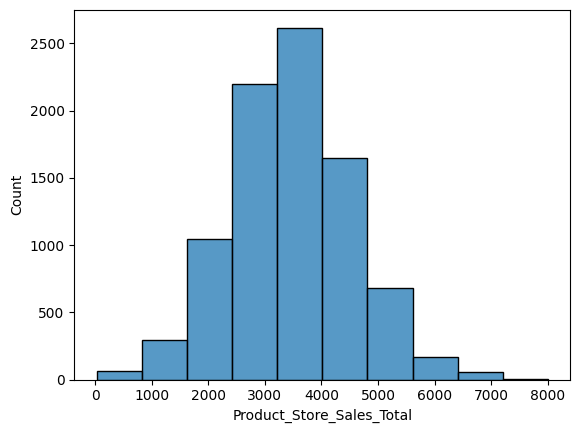

In [ ]:
sns.histplot(dataset['Product_Store_Sales_Total'], bins=10)

### Observations from EDA

**Observations on Categorical Columns**

**Product Sugar Content**
* Four categories, with "Low Sugar" being the most common (4885 entries).
Shows a clear preference or labeling trend towards low sugar products.
* Reg seems to be a typo, and this will be corrected and merged with regular as data description suggests that there are onl 3 types of entries - low, regular and no sugar

**Product Type**

* Sixteen distinct types, with "Fruits and Vegetables" as the largest group (1249 entries).
Indicates a diverse product range with some categories more dominant.

**Store Id**

* Four unique stores, with "OUT004" having the highest count (4676 entries).
Suggests "OUT004" is the busiest or largest outlet in the dataset.

**Store Size**

* Three size categories, mostly "Medium" (6025 entries).
Majority of stores fall into the medium size range.

**Store Location City Type**

* Three city tiers, predominantly "Tier 2" (6262 entries).
Reflects a focus on mid-tier city locations.

**Store Type**

* Four types, with "Supermarket Type2" most frequent (4676 entries).
Suggests a specific store type dominates sales or data representation.

**Observations on Numerical Columns**

**Product Weight**

* Mean and median are nearly equal, indicating a symmetric distribution.
Most products fall between 11.15 and 14.18, with a few heavy outliers up to 22.

**Product Allocated Area**

* Right-skewed distribution; a few products occupy large shelf space.
Majority have very small area allocation, some as low as 0.004.

**Product MRP**

* Prices mostly range between 126 and 168, centered around 147.
Some high-priced items (up to 266) may skew the average.

**Store Establishment Year**

* Most stores were established around 2009.
The store network is relatively recent, with a mean year of 2002.

## Bivariate Analysis

### Target variable vs Numerical Columns

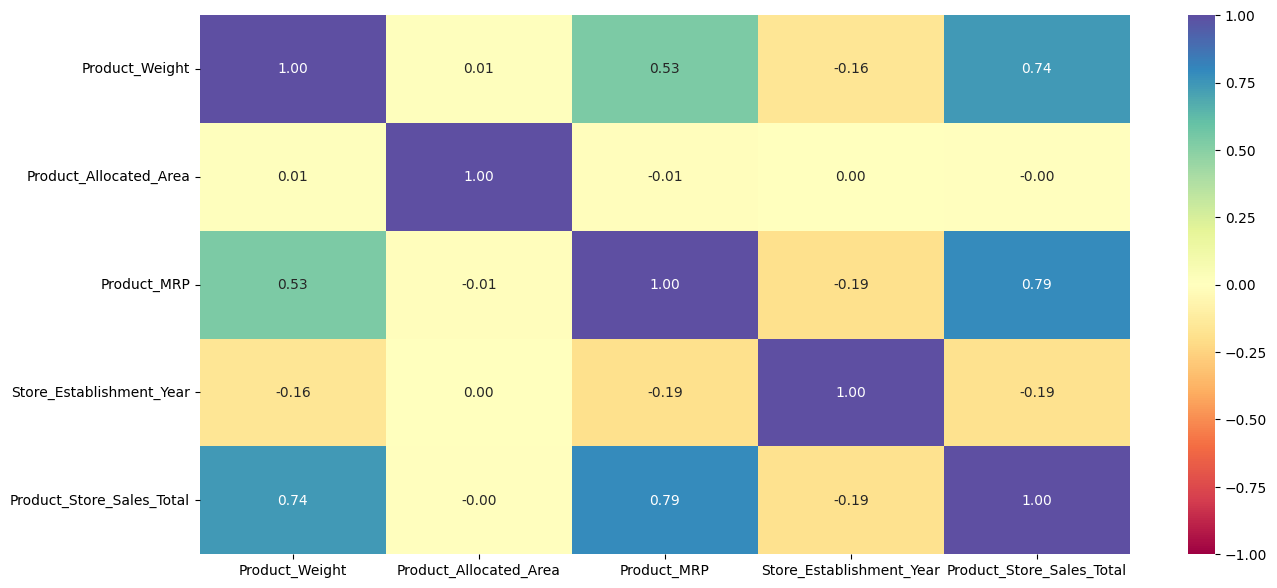

In [ ]:
# Checking correlation between numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(dataset.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

Our target variable, **Product_Store_Sales_Total**, seems to be highly positively correlated to -

* **Product_Weight**
* **Product_MRP**

The target variable seems to have a negative correlation with

* **Store_Establishment_Year**

The targe variable seems to have no correlation with

* **Product_Allocated_Area**

### Target variables vs Categorical Columns

<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

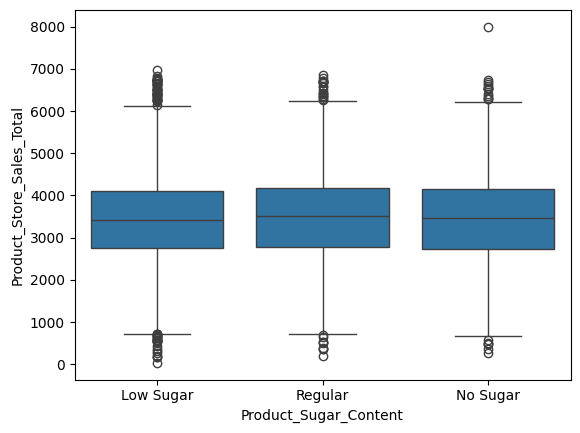

In [ ]:
sns.boxplot(x='Product_Sugar_Content', y='Product_Store_Sales_Total', data=dataset)

**Observations**

* The median sales are very similar, suggesting that sugar content does not drastically affect the central tendency of store-level product sales.

* All three categories have a significant number of outliers at both low and high ends, especially above the upper whisker.

* The interquartile range is comparable across all three sugar types, indicating that the variability of product sales is fairly consistent regardless of sugar content.

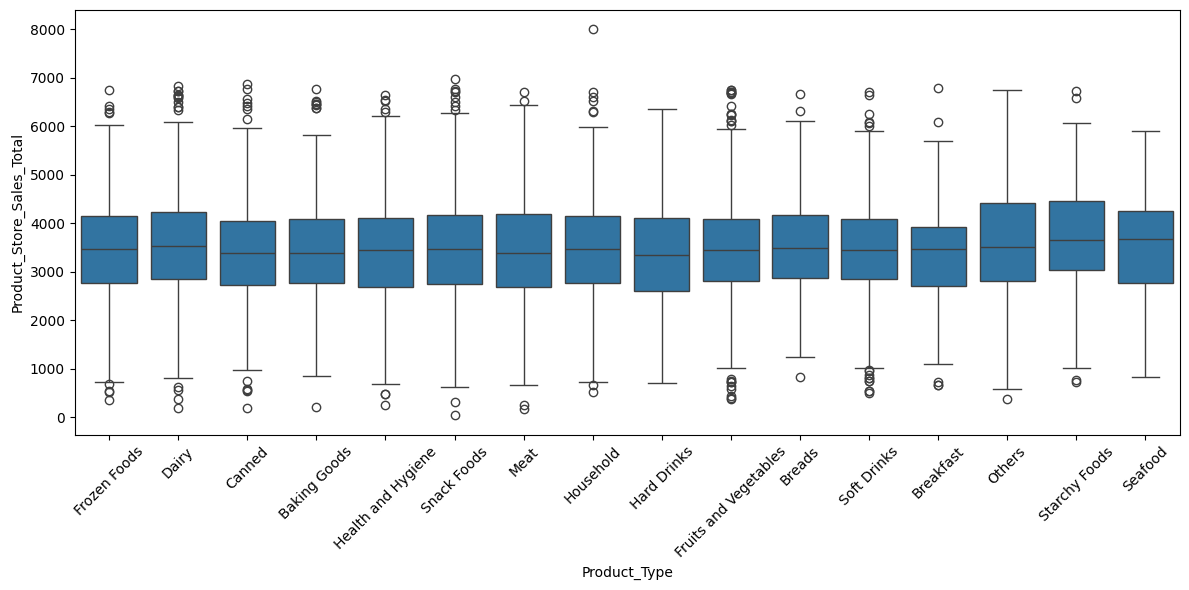

In [ ]:
plt.figure(figsize=(12, 6))  # Wider plot gives more space for labels
sns.boxplot(x='Product_Type', y='Product_Store_Sales_Total', data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

* The median sales are very similar, suggesting that type of product does not drastically affect the central tendency of product sales.

* There are significantly more outliers in certain products like Sairy, Fruits and Vegetables, Heath and Hygiene etc., as compared to products like Seafood, Hard Drinks and Others.

<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

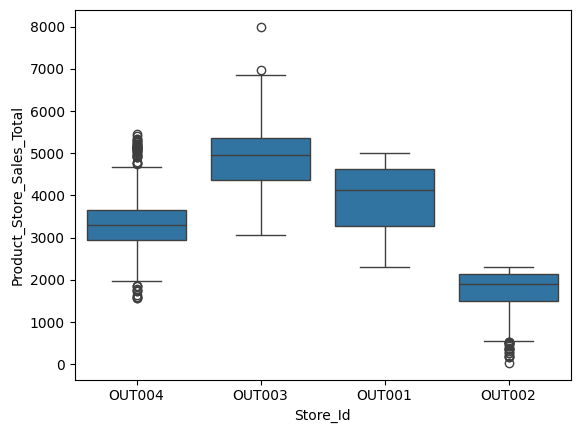

In [ ]:
sns.boxplot(x='Store_Id', y='Product_Store_Sales_Total', data=dataset)

**Observations**

* There are significant outliers in Store Id OUT004 and OUT002.

* Store Id OUT003 has significantly higher sales as compared to other stores.

<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

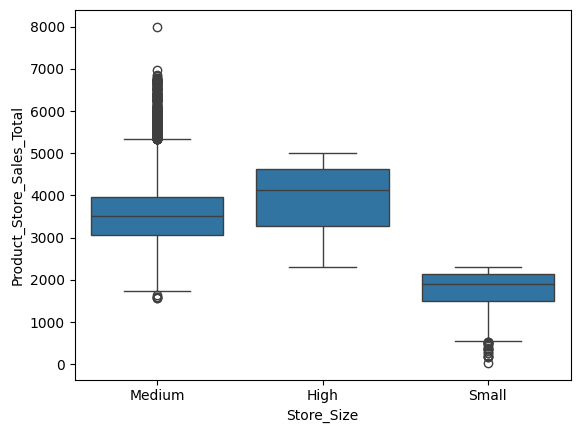

In [ ]:
sns.boxplot(x='Store_Size', y='Product_Store_Sales_Total', data=dataset)

**Observations**

* Medium and small store sizes exhibit several outliers in sales on the higher and lower end respectively.

* Small stores show significantly lower sales compared to medium and high store sizes.

<Axes: xlabel='Store_Location_City_Type', ylabel='Product_Store_Sales_Total'>

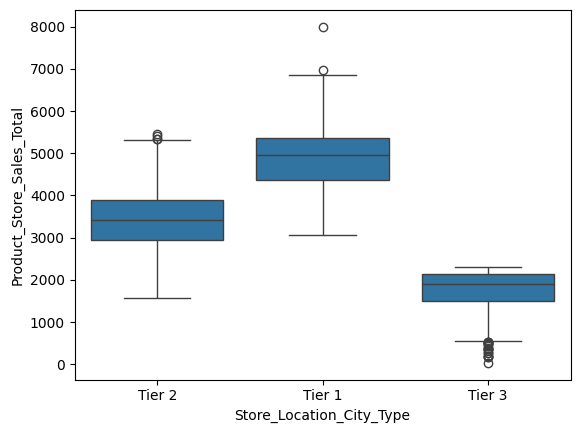

In [ ]:
sns.boxplot(x='Store_Location_City_Type', y='Product_Store_Sales_Total', data=dataset)

**Observations**

* Tier 2 and Tier 3 cities show several sales outliers, with Tier 2 skewing higher and Tier 3 lower.

* Tier 3 cities have noticeably lower sales, while Tier 1 cities record significantly higher sales overall.

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

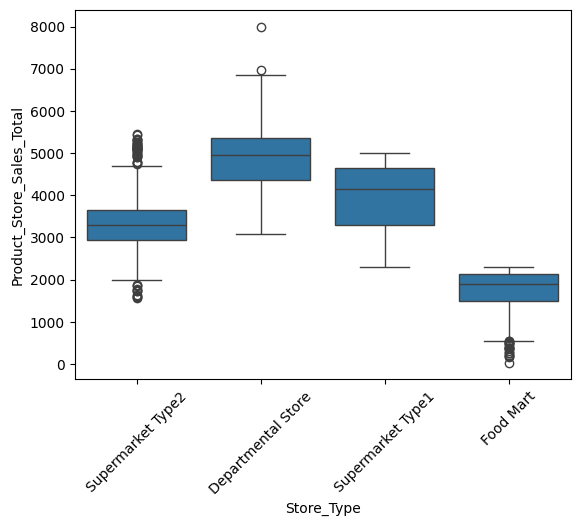

In [ ]:
sns.boxplot(x='Store_Type', y='Product_Store_Sales_Total', data=dataset)
plt.xticks(rotation=45)

**Observations**

* Among store types, Food Marts have the lowest total sales, while Department Stores record the highest.

* Supermarket Type 2 exhibits several outliers at both the high and low ends of the sales spectrum.

# **Data Preprocessing**

In [ ]:
# Define predictor matrix (X) using selected numeric and categorical features
X = dataset[numeric_features + categorical_features]

# Define target variable
y = dataset[target]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

Creating a preprocessing pipeline for numerical and categorical features to do the following -

1. Numerical imputation – using median

2. Numerical scaling – using standardization (StandardScaler)

3. Categorical imputation – using most frequent value

4. Categorical encoding – using one-hot encoding

5. Combining transformations – using make_column_transformer to apply steps to respective columns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [ ]:
preprocessor = make_column_transformer(
    (Pipeline([('num_imputer', SimpleImputer(strategy='median')),
               ('scaler', StandardScaler())]), numeric_features),
    (Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
               ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

### Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

For my project, I will be creating a Bagging model (Random Forest) and a Boosting model (XGBoost) - combining the robustness and variance reduction of bagging with the bias reduction and improved accuracy of boosting.

### Random Forest Regressor - Model Training Pipeline

In [ ]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Create pipeline with preprocessing and Random Forest model
rf_pipeline = make_pipeline(preprocessor, rf_model)

In [ ]:
# Train the model pipeline on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline, X_train,y_train)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,107.326895,40.645798,0.989842,0.989828,0.015197


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline, X_test,y_test)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,283.305602,109.298449,0.929658,0.929254,0.038891


**Observations**

* RMSE and MAE are significantly higher on the test set, indicating reduced accuracy on unseen data.

* R-squared drops from 0.99 (train) to 0.93 (test), suggesting the model doesn’t explain the variance as well on new data.

* The model performs better on the training set, indicating it may have captured patterns specific to the training data.

* Despite the drop, the test R squared of 0.93 and low MAPE show the model still generalizes reasonably well.

### Random Forest Regressor - Hyperparameter Tuning

In [ ]:
from sklearn import metrics

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
rf_pipeline = make_pipeline(preprocessor, rf_tuned)

# Grid of parameters to choose from
parameters = parameters = {
    'randomforestregressor__max_depth':[3, 4, 5, 6],
    'randomforestregressor__max_features': ['sqrt','log2',None],
    'randomforestregressor__n_estimators': [50, 75, 100, 125, 150]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_pipeline, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features=None,
                                       n_estimators=150, random_state=42))])

In [ ]:
print(grid_obj.best_params_)

{'randomforestregressor__max_depth': 6, 'randomforestregressor__max_features': None, 'randomforestregressor__n_estimators': 150}


In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n")
rf_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,293.335688,155.227392,0.924125,0.924016,0.055745


In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n")
rf_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,315.384667,168.35306,0.912826,0.912325,0.059391


**Observations**

* Before tuning, the model had very low training errors but much higher testing errors, showing overfitting. After tuning, train and test errors are closer, meaning better generalization.

* The slight decrease in R squared after tuning indicates the model sacrifices some training accuracy to achieve better stability and generalization on unseen data.

### XGBoost Regressor - Model Training Pipeline

In [ ]:
# Define base XGBoost model
xgb_model = XGBRegressor(random_state=42)

In [ ]:
# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_model)

In [ ]:
# Train the model pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_pipeline, X_train, y_train)
print("Training performance \n")
xgb_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,132.873337,62.735069,0.984431,0.984409,0.022233


In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_pipeline, X_test,y_test)
print("Testing performance \n")
xgb_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,310.109498,137.521286,0.915718,0.915234,0.050988


**Observations**

* The low RMSE and MAE values on training indicate the model captures patterns well but may be too closely tailored to the training set.

* Higher errors on the test set suggest the model could be overfitting and might benefit from hyperparameter tuning.

### XGBoost Regressor - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_tuned)

#Grid of parameters to choose from
param_grid = {
    'xgbregressor__n_estimators': [50, 100, 150, 200],    # number of trees to build
    'xgbregressor___max_depth': [2, 3, 4],    # maximum depth of each tree
    'xgbregressor___colsample_bytree': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each tree
    'xgbregressor___colsample_bylevel': [0.4, 0.5, 0.6],    # percentage of attributes to be considered (randomly) for each level of a tree
    'xgbregressor___learning_rate': [0.01, 0.05, 0.1],    # learning rate
    'xgbregressor___reg_lambda': [0.4, 0.5, 0.6],    # L2 regularization factor
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_pipeline, param_grid, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, ...))])

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n")
xgb_tuned_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,185.315326,80.853314,0.969717,0.969674,0.029531


In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n")
xgb_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,304.748698,131.948767,0.918606,0.918139,0.048642


**Observations**

* High R-squared in both test and train data indicates that the model is capturing the underlying patterns well and generalizing effectively to unseen data, with minimal underfitting or overfitting.

* Low and relatively close error values in both train and test sets indicate the model’s predictions are consistently accurate

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,107.326895,293.335688,132.873337,185.315326
MAE,40.645798,155.227392,62.735069,80.853314
R-squared,0.989842,0.924125,0.984431,0.969717
Adj. R-squared,0.989828,0.924016,0.984409,0.969674
MAPE,0.015197,0.055745,0.022233,0.029531


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,283.305602,315.384667,310.109498,304.748698
MAE,109.298449,168.353060,137.521286,131.948767
R-squared,0.929658,0.912826,0.915718,0.918606
Adj. R-squared,0.929254,0.912325,0.915234,0.918139
MAPE,0.038891,0.059391,0.050988,0.048642


In [ ]:
(models_train_comp_df - models_test_comp_df).iloc[2]

,R-squared
Random Forest Estimator,0.060185
Random Forest Tuned,0.011299
XGBoost,0.068714
XGBoost Tuned,0.051111


**Observations**

* The tuned XGBoost model achieves the highest R squared score on the training set, indicating strong learning ability.

* The tuned Random Forest model exhibits the smallest difference between training and testing R squared scores, suggesting it generalizes best with minimal overfitting.

* Although the tuned XGBoost model has a higher training R squared, its larger train-test gap indicates it may overfit more than the tuned Random Forest.


Considering both predictive power and generalization, the Random Forest Tuned offers the best balance, while the tuned XGBoost provides the highest training accuracy but with more risk of overfitting.

We will be selecting the **Random Forest Tuned** will be the final model which we choose to serialize for deployment.

# **Model Serialization**

## Serialization

In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/product_sales_prediction_model_v1_0.joblib"

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(rf_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/product_sales_prediction_model_v1_0.joblib


In [ ]:
# Load the saved model pipeline from the file
saved_model = joblib.load("backend_files/product_sales_prediction_model_v1_0.joblib")

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Printing saved model
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Store_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Id',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features=None,
                                       n_estimators=150, random_state=42))])

## Making Predictions Using the Deserialized Model

In [ ]:
saved_model.predict(X_test)

array([3318.00030963, 3398.62954844, 2576.83731619, ..., 4220.78576824,
       2741.11619676, 4398.82082217])

As observed, the model can be used directly to make predictions without the need for retraining.

# **Deployment - Backend**

## Setting up a Hugging Face Docker Space for the Backend

Creating a Hugging Face Docker Space for the backend using the Hugging Face Hub API.

In [ ]:
# API request
import requests

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
login(token="mytoken")

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("superkart-backend",
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create a Docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-6845ab6b-7c892d0062ea89483672f4f0;455a81e5-f8b2-4263-894b-e010288a6e50)

You already created this space repo


## Flask Web Framework


In [ ]:
%%writefile backend_files/app.py
import joblib
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize the Flask application
product_sales_predictor_api = Flask("Product Sales Price Predictor")

# Load the trained machine learning model
model = joblib.load("product_sales_prediction_model_v1_0.joblib")

# Define a route for the home page (GET request)
@product_sales_predictor_api.get('/')
def home():
    """
    This function handles GET requests to the root URL ('/') of the API.
    It returns a simple welcome message.
    """
    return "Welcome to the Product Sales Prediction API!"

# Define an endpoint for single property prediction (POST request)
@product_sales_predictor_api.post('/v1/psales')
def predict_product_sales():
    """
    This function handles POST requests to the '/v1/psales' endpoint.
    It expects a JSON payload containing store details and returns
    the predicted product sales price as a JSON response.
    """
    # Get the JSON data from the request body
    product_sales = request.get_json()

    # Extract relevant features from the JSON data
    sample = {
        'Product_Weight': product_sales['Product_Weight'],
        'Product_Sugar_Content': product_sales['Product_Sugar_Content'],
        'Product_Allocated_Area': product_sales['Product_Allocated_Area'],
        'Product_Type': product_sales['Product_Type'],
        'Product_MRP': product_sales['Product_MRP'],
        'Store_Id': product_sales['Store_Id'],
        'Store_Establishment_Year': product_sales['Store_Establishment_Year'],
        'Store_Size': product_sales['Store_Size'],
        'Store_Location_City_Type': product_sales['Store_Location_City_Type'],
        'Store_Type': product_sales['Store_Type'],

    }

    # Convert the extracted data into a Pandas DataFrame
    input_data = pd.DataFrame([sample])

    # Make prediction (get log_price)
    predicted_price = model.predict(input_data)[0]

    # Convert predicted_price to Python float
    predicted_price = round(float(predicted_price), 2)
    # The conversion above is needed as we convert the model prediction (log price) to actual price using np.exp, which returns predictions as NumPy float32 values.
    # When we send this value directly within a JSON response, Flask's jsonify function encounters a datatype error

    # Return the actual price
    return jsonify({'Predicted Price (in dollars)': predicted_price})


# Define an endpoint for batch prediction (POST request)
@product_sales_predictor_api.post('/v1/psalesbatch')
def predict_product_sales_batch():
    """
    This function handles POST requests to the '/v1/psalesbatch' endpoint.
    It expects a CSV file containing property details for multiple stores
    and returns the predicted product sales prices as a dictionary in the JSON response.
    """
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the CSV file into a Pandas DataFrame
    input_data = pd.read_csv(file)

    # Make predictions for all properties in the DataFrame (get log_prices)
    predicted_prices = [round(float(price),2) for price in model.predict(input_data).tolist()]

    # Create a dictionary of predictions with property IDs as keys
    product_ids = input_data['id'].tolist()  # Assuming 'id' is the property ID column
    output_dict = dict(zip(product_ids, predicted_prices))  # Use actual prices

    # Return the predictions dictionary as a JSON response
    return output_dict

# Run the Flask application in debug mode if this script is executed directly
if __name__ == '__main__':
    product_sales_predictor_api.run(host='0.0.0.0', port=8501, debug=True)

Overwriting backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
uvicorn[standard]
streamlit==1.43.2

Overwriting backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:product_sales_predictor_api`: Runs the Flask app (assuming `app.py` contains the Flask instance named `product_sales_predictor_api`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:product_sales_predictor_api"]


Overwriting backend_files/Dockerfile


In [ ]:
# confirming whether all the files have been created in the correct location
!ls backend_files

app.py	    product_sales_prediction_model_v1_0.joblib
Dockerfile  requirements.txt


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import HfApi

repo_id = "sujatasuren/superkart-backend"  # Your Hugging Face space id

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/sujatasuren/superkart-backend/commit/8ae3581a41a0acdb5fc94bbd998fd635f04faa90', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8ae3581a41a0acdb5fc94bbd998fd635f04faa90', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/sujatasuren/superkart-backend', endpoint='https://huggingface.co', repo_type='space', repo_id='sujatasuren/superkart-backend'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py

import streamlit as st
import pandas as pd
import joblib
import requests


# Streamlit UI for Customer Churn Prediction
st.title("Product Sales Prediction App")
st.write("The Product Sales Prediction App is a tool for businesses to forecast future sales and plan operations more effectively.")
st.write("Kindly enter the product details to predict the expected sales revenue")

# Collect user input
ProductWeight = st.number_input("Product Weight (weight of the product)", min_value=4.0, max_value=22.0, value=12.6)
ProductSugarContent = st.selectbox("Product Sugar Content(sugar content of the product)", ["Low Sugar", "Regular", "No sugar"])
ProductAllocatedArea = st.number_input("Product Allocated Area (ratio of the allocated display area of each product to the total display area )", min_value=0.00, max_value=0.29, value=0.06)
ProductType = st.selectbox("Product Type", ['Baking Goods', 'Breads', 'Breakfast', 'Canned',
                                              'Dairy', 'Frozen Food', 'Fruits and Vegetables',
                                              'Hard Drinks', 'Health and Hygiene', 'Household',
                                              'Meat', 'Others', 'Seafood', 'Snack foods',
                                              'Soft Drinks', 'Starchy Foods'])
ProductMRP = st.number_input("Product MRP(maximum retail price of each product)", min_value=31.0, max_value=266.0, value=141.0)
StoreID = st.selectbox("Store Id",['OUT001', 'OUT002', 'OUT003', 'OUT004'] )
StoreEstablishmentYear = st.number_input("Store Establishment Year (the year in which the store was established)", min_value=1987, max_value=2009, value=2000)
StoreSize= st.selectbox("Store Size", ['Small','Medium', 'High'])
StoreLocationCityType = st.selectbox("Store Location City Type", ['Tier 1', 'Tier 2', 'Tier 3'])
StoreType = st.selectbox("Store Type",['Departmental Store', 'Food Mart', 'Supermarket Type 1', 'Supermarket Type 2'])

# Convert categorical inputs to match model training
# Syntax
#input_data = pd.DataFrame([{'datasetvariable1': userinputvariable1,}])
input_data = pd.DataFrame([{
    'Product_Weight': ProductWeight,
    'Product_Sugar_Content': ProductSugarContent,
    'Product_Allocated_Area': ProductAllocatedArea,
    'Product_Type': ProductType,
    'Product_MRP': ProductMRP,
    'Store_Id': StoreID,
    'Store_Establishment_Year': StoreEstablishmentYear,
    'Store_Size': StoreSize,
    'Store_Location_City_Type': StoreLocationCityType,
    'Store_Type': StoreType
}])

if st.button("Predict"):
    headers = {'Content-Type': 'application/json'}
    response = requests.post("https://sujatasuren-superkart-backend.hf.space/v1/psales", json=input_data.to_dict(orient='records')[0], headers=headers)  # Send data to Flask API
    if response.status_code == 200:
        prediction = response.json()['Predicted Price (in dollars)']
        st.success(f"The predicted product sales revenue is $ {prediction}")
    else:
        st.error("Error in API request")
        st.write(f"Status Code: {response.status_code}")
        st.write(f"Response Text: {response.text}")

# Section for batch prediction
st.subheader("Batch Prediction")

# Allow users to upload a CSV file for batch prediction
uploaded_file = st.file_uploader("Upload CSV file for batch prediction", type=["csv"])

# Make batch prediction when the "Predict Batch" button is clicked
if uploaded_file is not None:
    if st.button("Predict Batch"):
        response = requests.post("https://sujatasuren-superkart-backend.hf.space/v1/psalesbatch", files={"file": uploaded_file})  # Send file to Flask API
        if response.status_code == 200:
            predictions = response.json()
            st.success("Batch predictions completed!")
            st.write(predictions)  # Display the predictions
        else:
            st.error("Error making batch prediction.")

Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2
joblib==1.4.2

Overwriting frontend_files/requirements.txt


## DockerFile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting frontend_files/Dockerfile


In [ ]:
# confirming whether all the files have been created in the correct location
!ls frontend_files

app.py	Dockerfile  requirements.txt


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = "mytoken"  # Your Hugging Face token created from access keys in write mode
repo_id = "sujatasuren/superkart-frontend"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/sujatasuren/superkart-frontend/commit/cfafe8529c2b6924aded5cdfecd386c9493e3256', commit_message='Upload folder using huggingface_hub', commit_description='', oid='cfafe8529c2b6924aded5cdfecd386c9493e3256', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/sujatasuren/superkart-frontend', endpoint='https://huggingface.co', repo_type='space', repo_id='sujatasuren/superkart-frontend'), pr_revision=None, pr_num=None)

# **Inferencing**


In [ ]:
import json  # To handle JSON formatting for API requests and responses
import requests  # To send HTTP requests to the deployed Flask API

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

In [ ]:
model_root_url = "https://sujatasuren-superkart-backend.hf.space/"  # Base URL of the deployed Flask API on Hugging Face Space

In [ ]:
model_url = model_root_url + "/v1/psales"  # Endpoint for online (single) inference

In [ ]:
model_batch_url = model_root_url + "/v1/psalesbatch"  # Endpoint for batch inference

In [ ]:
payload ={
  "Product_Weight": 12.6,
  "Product_Sugar_Content": "Regulat",
  "Product_Allocated_Area": 0.06,
  "Product_Type": "Snack foods",
  "Product_MRP": 141.0,
  "Store_Id": "OUT003",
  "Store_Establishment_Year": 2002,
  "Store_Size": "Medium",
  "Store_Location_City_Type": "Tier 1",
  "Store_Type": "Supermarket Type 1"
}

In [ ]:
# Sending a POST request to the model endpoint with the test payload
response = requests.post(model_url, json=payload)

In [ ]:
response

<Response [200]>

In [ ]:
response.json()

{'Predicted Price (in dollars)': 5865.18}

* The <Response [200]> is the HTTP status code.

* It indicates that the request was successful, and the server was able to process it without any problems.

# **Actionable Insights and Business Recommendations**

**Insights**

* By serializing the trained model with **joblib**, we ensured that both the prediction logic and preprocessing pipeline were preserved. This made it easy to load and reuse the model consistently in production environments.

* Separating the Streamlit **frontend** from the Flask **backend** via an API interface enhanced modularity and made debugging, testing, and future upgrades more manageable—especially for large-scale deployment across multiple stores.

* Using a Dockerfile for both the frontend and backend ensured that the application runs in a consistent environment. This reduces environment-related bugs and makes collaboration and deployment easier.

* Deploying both frontend (Streamlit) and backend (Flask API) via Hugging Face Spaces allowed for quick public sharing and testing of the forecasting tool without requiring cloud infrastructure or DevOps setup.



**Recommendations**

* Allocate more inventory and marketing budget to OUT003 to further boost sales and as Store ID OUT003 has significantly higher sales than other stores.

* Consider converting small stores to larger formats where feasible or optimize product assortment to improve revenue per square foot as small stores show significantly lower sales than medium and high-sized stores.

* Prioritize store openings, promotional campaigns, and high-value inventory in Tier 1 cities to maximize returns.

* Consider rebranding or repurposing underperforming Food Marts into hybrid or departmental formats.

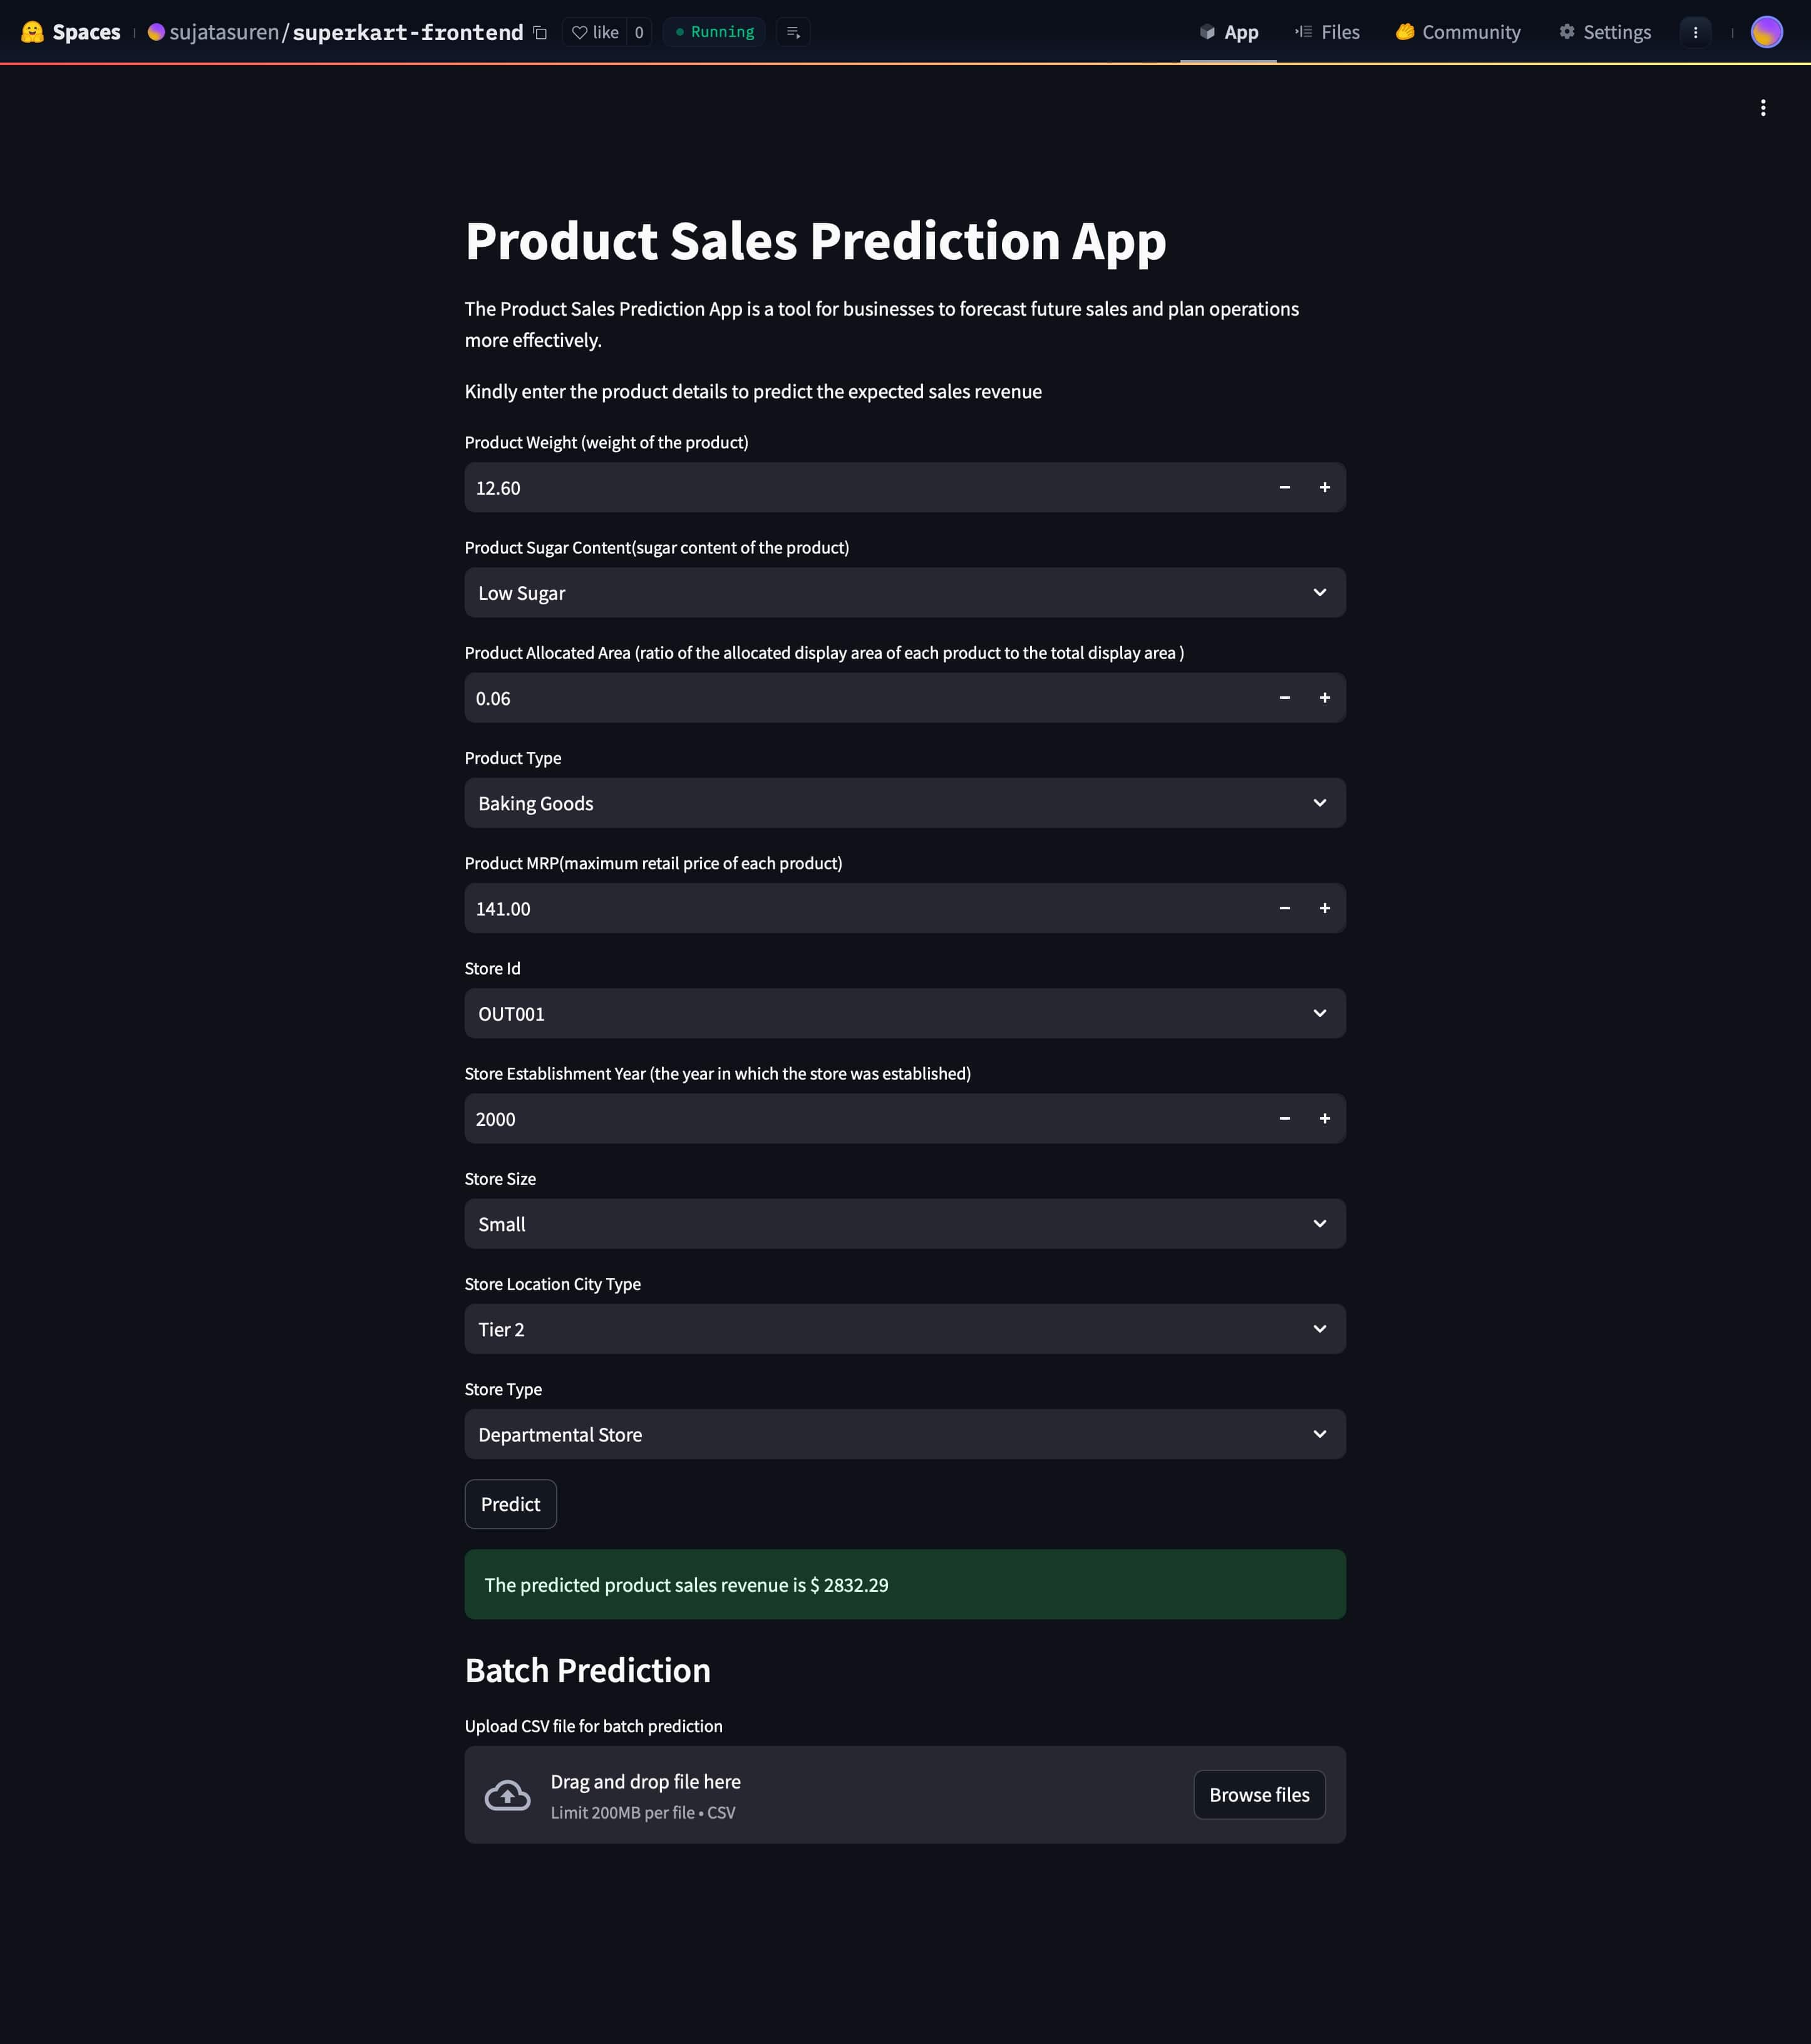

## Converting into html

In [ ]:
!jupyter nbconvert /content/drive/MyDrive/Colab_Notebooks/Sujata_Surendranathan_Project_7.ipynb --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Sujata_Surendranathan_Project_7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 1517441 bytes to /content/drive/MyDrive/Colab_Notebooks/Sujata_Surendranathan_Project_7.html
